In [26]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import fft

In [27]:
np.random.seed(314)
def fourier(fn: callable, s=-5, dt=0.1, n=100, noise=False):
    x = np.linspace(s, s+dt*n, n)
    y = fn(x)
    ya = np.array(y, copy=True)
    if noise:
        y += np.random.uniform(-1, 1, x.shape)
    freqs = fft.fftshift(fft.fftfreq(n, dt))
    yfft = fft.fftshift(fft.fft(y))
    return ya, x, y, freqs, yfft

In [28]:
def plot(x_raw, y_raw, y_proc=None, y_actual=None):
    fig, ax = plt.subplots(2, 1)
    ax[0].set_title("Raw vs Processed")
    ax[0].plot(x_raw, y_raw, label="Raw")
    if y_proc is not None:
        ax[0].plot(x_raw, y_proc, label="Processed")
    if y_actual is not None:
        ax[0].plot(x_raw, y_actual, label="Actual")
    ax[0].legend()

    ax[1].set_title("Difference")
    ax[1].axhline(0)
    ax[1].plot(x_raw, y_proc-y_actual)


In [29]:
def plot_freq(x_raw, y_raw, y_proc=None, y_actual=None):
    fig, ax = plt.subplots(2, 1)
    ax[0].set_title("Raw vs Processed")
    ax[0].plot(x_raw, y_raw, label="Raw")
    if y_proc is not None:
        ax[0].plot(x_raw, abs(y_proc), label="Processed")
    if y_actual is not None:
        ax[0].plot(x_raw, abs(y_actual), label="Actual")
    ax[0].legend()

    ax[1].set_title("Difference")
    ax[1].axhline(0)
    ax[1].plot(x_raw, abs(y_proc)-abs(y_actual))

In [30]:
ya, x, y, freqs, yfft = fourier(lambda x: 1/25*(x**3 - x**2 + x - 5), noise=True)

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

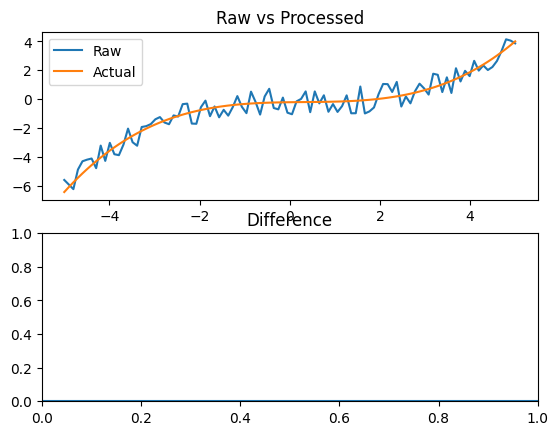

In [31]:
plot(x, y, y_actual=ya)

/Library/Python/3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


TypeError: unsupported operand type(s) for -: 'NoneType' and 'complex'

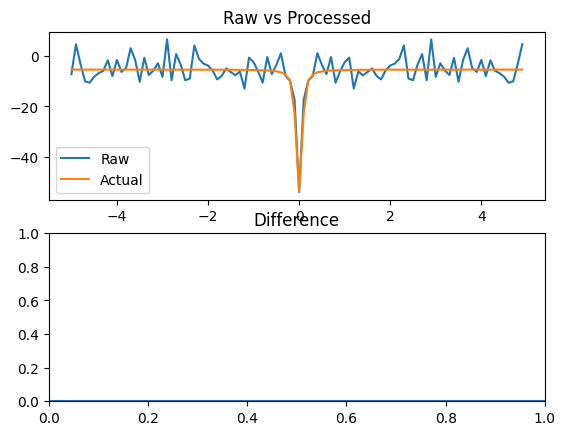

In [32]:
plot(freqs, yfft, y_actual=fft.fftshift(fft.fft(ya)))

In [33]:
def butter(yfft, order=4, normalised_cutoff=0.25):
    # Design the Butterworth filter
    b, a = sp.signal.butter(order, normalised_cutoff)

    # Apply the filter to the signal using filtfilt to achieve zero-phase filtering
    return sp.signal.filtfilt(b, a, yfft)

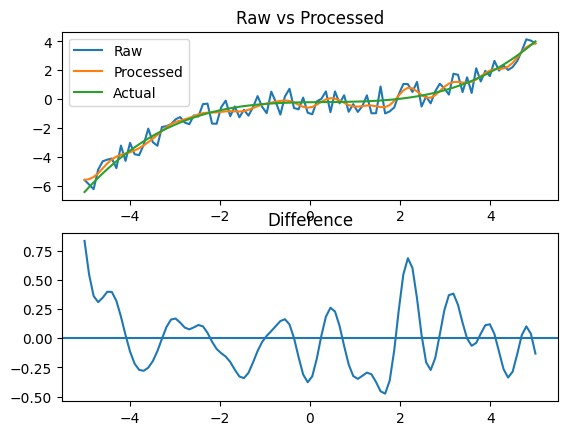

In [34]:
filtered_signal = butter(y)
plot(x, y, filtered_signal, ya)

In [ ]:
def ifft(yfft):
    yfft = fft.ifftshift(yfft)
    return fft.ifft(yfft)

In [ ]:
y_proc = ifft(filtered_signal)

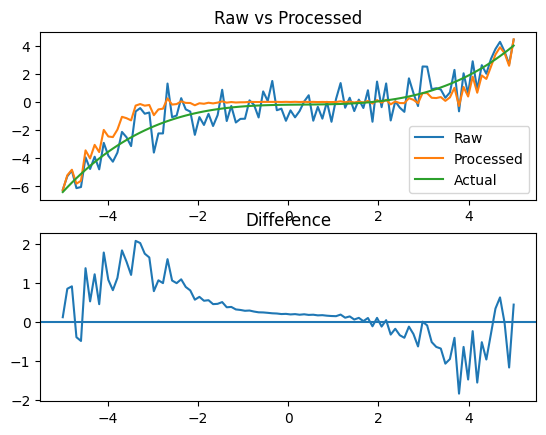

In [ ]:
plot(x, y, y_proc, ya)

In [ ]:
diff_raw = sum((y-ya)**2)
diff_raw

88.36042433619298

In [ ]:
diff_proc = sum((y_proc-ya)**2)
diff_proc

(63.522992111764-0.08810750195292089j)

In [ ]:
ya, x, y, freqs, yfft= fourier(lambda x: np.sin(50*x))

In [ ]:
# Butterworth filter parameters
cutoff_frequency = np.percentile(freqs[freqs>0], 25)  # Cutoff frequency in Hz
order = 1  # Filter order

# Convert cutoff frequency to the normalized Nyquist frequency (0.0-1.0)
sampling_rate = 10
nyquist_frequency = 0.5 * sampling_rate
normalized_cutoff_frequency = cutoff_frequency / nyquist_frequency

# Design the Butterworth filter
b, a = sp.signal.butter(order, normalized_cutoff_frequency)

# Apply the filter to the signal using filtfilt to achieve zero-phase filtering
filtered_signal = sp.signal.filtfilt(b, a, yfft)
normalized_cutoff_frequency

0.26

TypeError: bad operand type for abs(): 'NoneType'

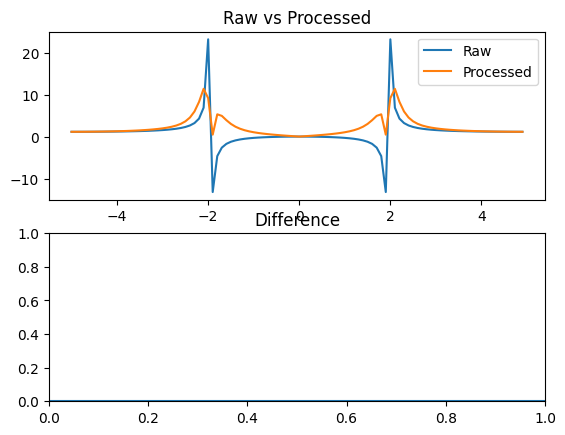

In [ ]:
plot_freq(freqs, yfft, filtered_signal)

TypeError: unsupported operand type(s) for -: 'complex' and 'NoneType'

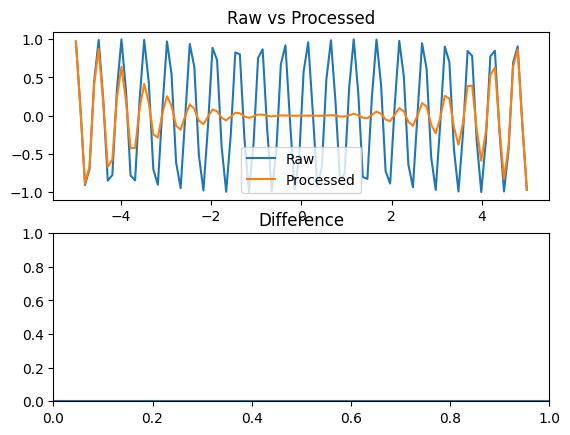

In [ ]:
inverse = ifft(filtered_signal)
plot(x, y, inverse)